In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [3]:
include("../model-35-sym/likelihood.jl")
include("../model-35-sym/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [4]:
function hist_2d(smpls, dim_1, dim_2; nbins=40, axmin = true, axmax=true)
    smpl_tmp, smpl_w = flatview(unshaped.(smpls.v)), smpls.weight
    if axmin == true
        hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
    else
       hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), (range(axmin[1], stop=axmax[1], length=nbins), range(axmin[2], stop=axmax[2], length=nbins))) 
    end
    hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

hist_2d (generic function with 1 method)

In [6]:
β1 = 0.015
β2 = 0.0077 # (0.8/30/sqrt(12))
β3 = 0.0058 # (0.8/40/sqrt(12))

prior =  NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.03, 0.19),],
        ang_spr = [truncated(Normal(4.0, 2.0), 1.0, 8.0), ],
        waist = [truncated(Normal(2.774, 0.03), 2.5, 3.6),],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1.0, 1.0, 1.0], 
        resy = [1.0, 1.0, 1.0], 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf),
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );  # works  

labels = [
    L"\sigma_x", 
    L"\sigma_y", 
    L"\sigma'_x", 
    L"\sigma'_y", 
    L"s_w",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

In [7]:
FPATH = "../../data/sampling_results/Benchmark-14/"

"../../data/sampling_results/Benchmark-14/"

In [8]:
readdir(FPATH)

31-element Vector{String}:
 "hc-11.hdf5"
 "hc-111.hdf5"
 "hc-141.hdf5"
 "hc-16.hdf5"
 "hc-166.hdf5"
 "hc-181.hdf5"
 "hc-191.hdf5"
 "hc-211.hdf5"
 "hc-216.hdf5"
 "hc-221.hdf5"
 "hc-236.hdf5"
 "hc-241.hdf5"
 "hc-261.hdf5"
 ⋮
 "hc-411.hdf5"
 "hc-416.hdf5"
 "hc-421.hdf5"
 "hc-436.hdf5"
 "hc-441.hdf5"
 "hc-446.hdf5"
 "hc-451.hdf5"
 "hc-51.hdf5"
 "hc-56.hdf5"
 "hc-61.hdf5"
 "hc-81.hdf5"
 "hc-91.hdf5"

In [9]:
# Plots: "lc-52.hdf5"  "hc-90.hdf5"

filename =  "hc-56.hdf5"  #readdir(FPATH)[208] # 18 - large population
smpl_tmp = bat_read(FPATH*filename).result
samples = varshape(prior).(smpl_tmp);

In [10]:
filename

# Example HC "hc-2.hdf5"
# Example LC "lc-169.hdf5"

"hc-56.hdf5"

In [11]:
smpl_vect = mode(samples)[1]

(tr_size = [0.11267965756022447], ang_spr = [4.784895082683267], waist = [3.2462606644750545], algmx = [32.918424724139605, 33.79917111260627, 20.78038949550818, 35.85796919680609], algmy = [36.69236364514657, 37.20694945629279, 20.132040232170986, 33.845893348501086], cam4_ped = 32.72330207422431, cam4_light_fluct = 2.1142401419637578, cam4_light_amp = 8.222791203313593, resx = [1.0, 1.0, 1.0], resy = [1.0, 1.0, 1.0], cam4_resx = 5.258823939920204, cam4_resy = 4.172373964614736, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [7.950849781013162, 10.698043783587769, 2.4915539470389274], s_cam = [0.0, 1.478, 15.026, 23.115])

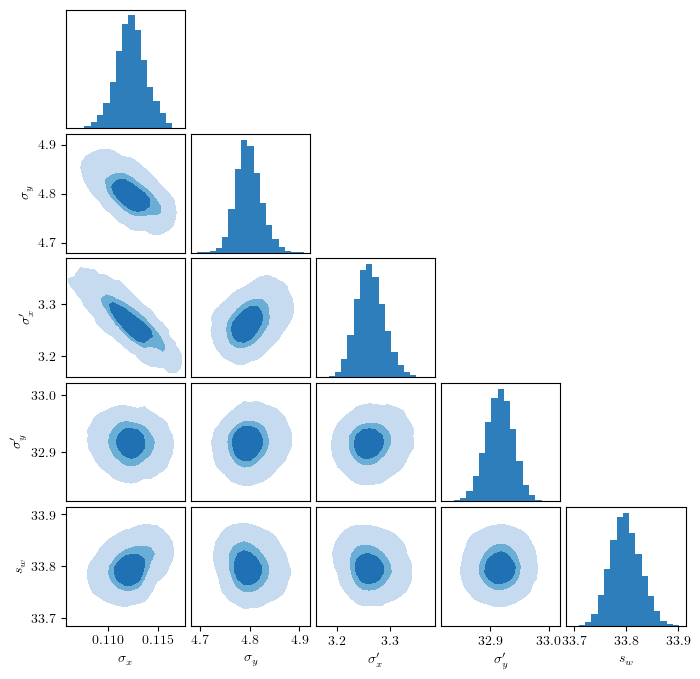

In [12]:
dims = [1,2,3,4,5]
names = labels[dims]
levels = [0.0001, 0.65, 0.9, 0.95,  1,]
# levels = [0.001, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

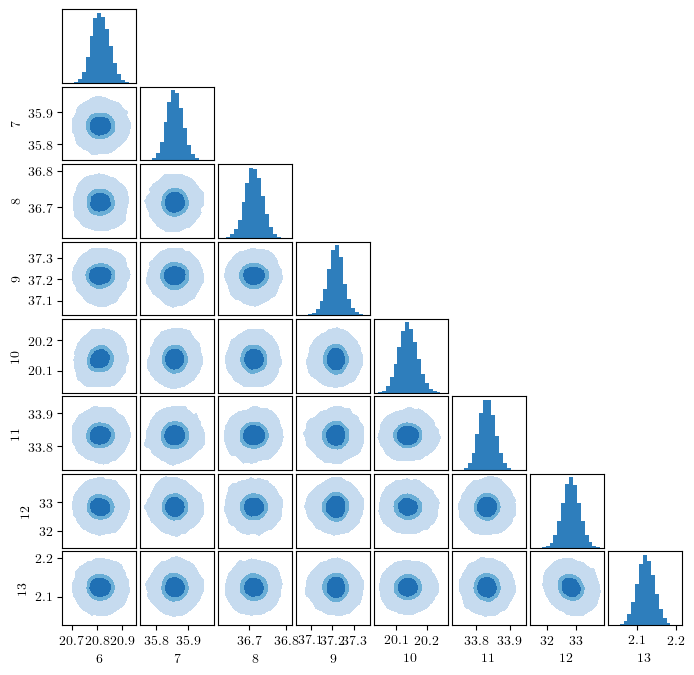

In [13]:
dims = 6:13
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [14]:
dims = 14:21
names = dims
levels = [0.01, 0.55, 0.9, 0.95,  1,]
# levels = [0.01, 0.65, 0.95, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

LoadError: BoundsError: attempt to access 19×581541 Matrix{Float64} at index [20, 1:581541]

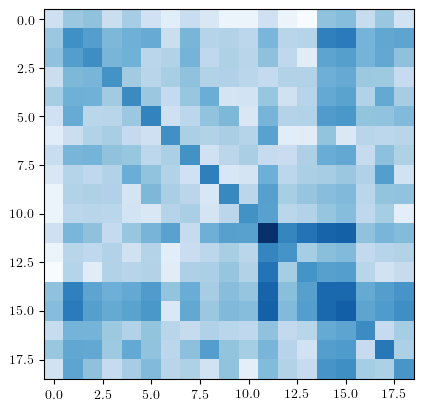

PyObject <matplotlib.image.AxesImage object at 0x7f7b63347340>

In [15]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

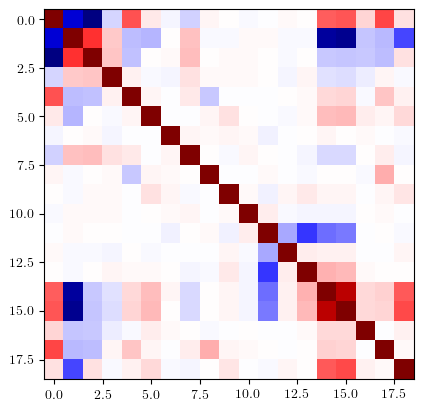

PyObject <matplotlib.image.AxesImage object at 0x7f7b791cf7c0>

In [16]:
dt_reg = flatview(unshaped.(samples.v)) ./ std(flatview(unshaped.(samples.v)), dims=2)
dt_reg = dt_reg .- mean(dt_reg, dims=2)
dt_reg = cov(dt_reg')
max = maximum(abs.(dt_reg))

plt.imshow(dt_reg, cmap="seismic", vmin=-max, vmax=max)

In [17]:
if filename[1:2] == "hc"
    
    conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m2/images-satur.jld2")
    event_number = parse(Int64, filename[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
    
    images = load("../../data/experiment/dataset_2/m2/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );
end

(cam_1 = [0.0 849.0 … 14.0 0.0; 0.0 115.0 … 12.0 0.0; … ; 82.0 1.0 … 4.0 0.0; 695.0 13.0 … 0.0 0.0], cam_2 = [0.0 16.0 … 0.0 301.0; 0.0 10.0 … 0.0 792.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], cam_3 = [106.0 122.0 … 1.0 0.0; 8.0 16.0 … 0.0 0.0; … ; 2.0 19.0 … 0.0 0.0; 7.0 26.0 … 0.0 0.0], cam_4 = [19.0 19.0 … 23.0 18.0; 19.0 21.0 … 26.0 27.0; … ; 21.0 14.0 … 24.0 18.0; 15.0 20.0 … 22.0 21.0], population = 25.845699310302734)

In [18]:
if filename[1:2] == "lc"
    @show "true"
    conv_mat = load("../../data/experiment/dataset_2/m1/conv-matrix-upd-2.jld2") 

    global conv_matrices = (
        cam_1 = conv_mat["cam_1"],
        cam_2 = conv_mat["cam_2"],
        cam_3 = conv_mat["cam_3"],
        cam_4 = conv_mat["cam_4"], 
    ) 

    images = load("../../data/experiment/dataset_2/m1/images-satur.jld2")
    event_number = parse(Int64, filename[4:end-5])

    global event = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    )
    
    images = load("../../data/experiment/dataset_2/m1/images.jld2")

    global event_nt = (
        cam_1 = images["cam_1"][event_number,:,:],
        cam_2 = images["cam_2"][event_number,:,:],
        cam_3 = images["cam_3"][event_number,:,:],
        cam_4 = images["cam_4"][event_number,:,:],
        population = images["charge"][event_number,:][1],
    );

end

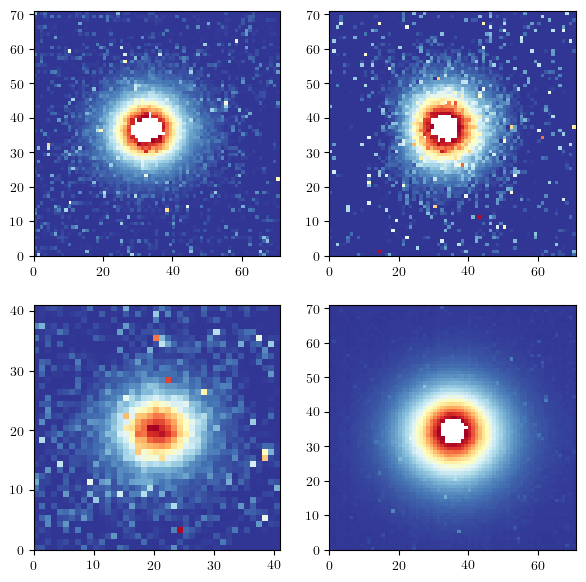

PyObject <matplotlib.collections.QuadMesh object at 0x7f7b79121280>

In [19]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

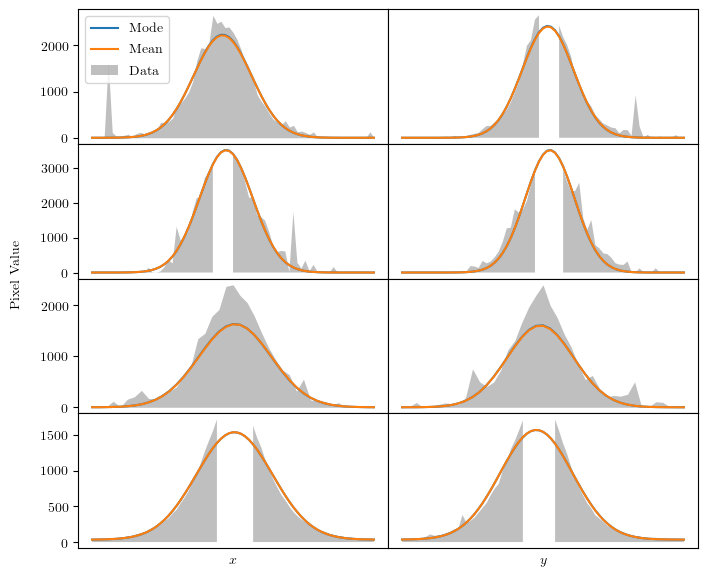

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


PyObject Text(0.04, 0.5, 'Pixel Value')

In [20]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_crossections(params_array, event, conv_matrices, colors = colors_array, labels=labels_array)

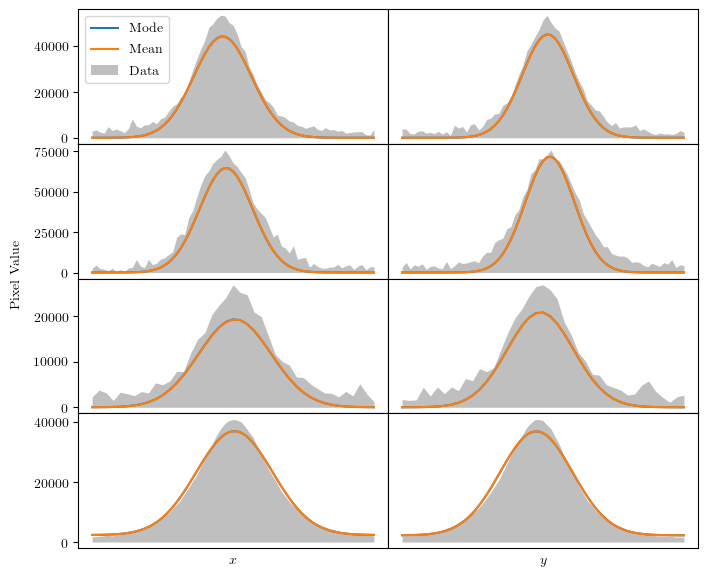

PyObject Text(0.04, 0.5, 'Pixel Value')

In [21]:
colors_array = ["C0", "C1"]
labels_array = ["Mode", "Mean"]
params_array = [mode(samples)[1], mean(samples)[1]]

plot_cam_integral(params_array, event_nt, conv_matrices, colors = colors_array, labels=labels_array)

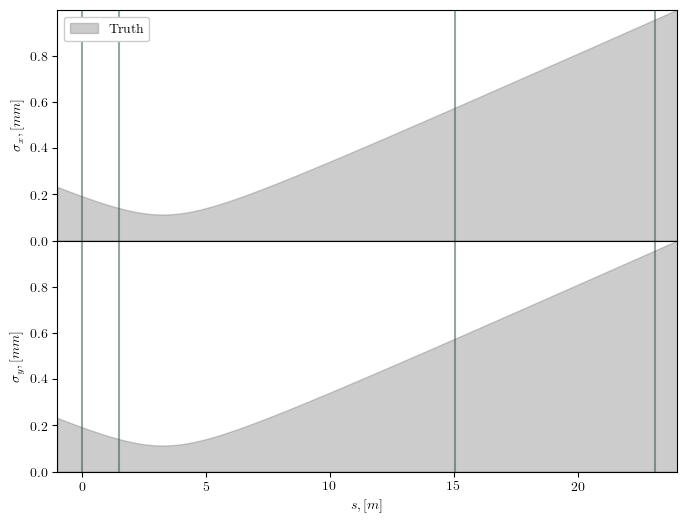

PyObject Text(0.5, 23.83700013837, '$s, [m]$')

In [22]:
params_array = [mode(samples)[1],]
colors_array = ["gray",]
labels_array = ["Truth", ]

plot_envelop_trajectory(params_array,  labels = labels_array, colors=colors_array)

In [23]:
# plot_projections(conv_matrices, event_nt, event_nt, params_array[1], isnontr = true)

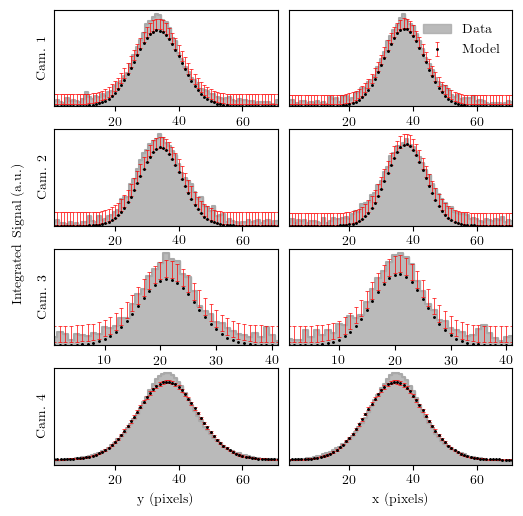

In [24]:
plot_projections(conv_matrices, event_nt, event_nt, params_array[1], 
    isnontr = true, 
    figsize=(5.905631659056317, 5.905631659056317),
    saveplot = false,
    filename = "../../plots/proj-m1-2.pdf"
)